# Ejemplo 1. Diseño de Filtros por el Metodo de Muestreo en Frecuencia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from numpy import pi

Se Debe diseñar un filtro pasa-bajos por el metodo de muestreo en frecuencia con las siguientes caracteristicas:

- Banda de paso de 0-5 kHz
- Frecuencia de muestreo de 18 kHz
- N = 9

Primero se definen todos los parametros del filtro

In [2]:
Fs = 18e3
N = 9
if N % 2 == 0:
    kmax = N//2 - 1 # Por ser N par
else:
    kmax = (N-1)//2 # Por ser N impar
alpha = (N-1)/2 # Por formula
paso = Fs/N # Tamaño de paso para muestrear

En este paso se debe definir correctamente la función $|H(k)|$ ya que es fundamental para encontrar $h(n)$

In [3]:
H_k = []
for k in range(kmax+1):
    if paso*k >= 0 and paso*k <= 5e3:
        H_k.append(1)
    else:
        H_k.append(0)
H_k

[1, 1, 1, 0, 0]

Se procede a calcular $h(n)$ con la formula estudiada en la teoria

In [4]:
h_n = []
for n in range(N):
    suma = 0
    for k in np.arange(1, kmax+1):
        suma += (1/N)*2*H_k[k]*np.cos(2*pi*k*(n-alpha)/N)
    suma += (1/N)*H_k[0]
    h_n.append(suma)

In [5]:
for it, item in enumerate(h_n):
    print(f'h[{it}] =', item)

h[0] = 0.07252262718512656
h[1] = -0.1111111111111111
h[2] = -0.059120987359772864
h[3] = 0.3199316935079797
h[4] = 0.5555555555555556
h[5] = 0.3199316935079797
h[6] = -0.059120987359772864
h[7] = -0.1111111111111111
h[8] = 0.07252262718512656


Se calcula su respuesta en frecuencia y se grafíca

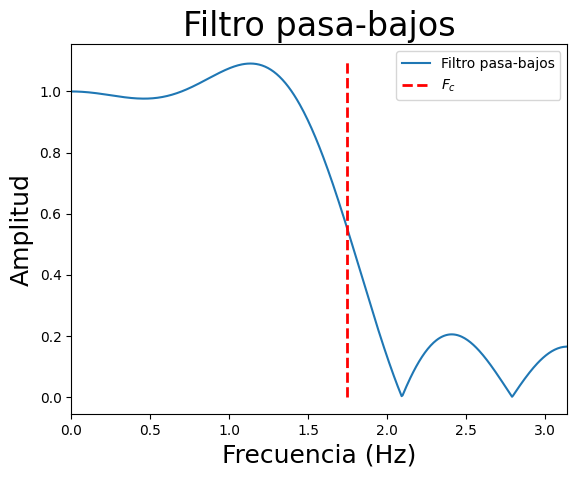

In [6]:
w, h = sp.freqz(h_n, 1, whole=True, worN=1024)
plt.figure()
plt.title('Filtro pasa-bajos', fontsize=24)
plt.plot(w-pi, np.abs(np.fft.fftshift(h)), label='Filtro pasa-bajos')
plt.vlines(2*pi*5e3/Fs, 0, 1.1, color='r', lw=2, linestyle='--', label='$F_c$')
plt.xlabel('Frecuencia (Hz)', fontsize=18)
plt.ylabel('Amplitud', fontsize=18)
plt.xlim([0, pi])
plt.legend(loc='best')
plt.show()